## Bring in libraries and dataframes and set indexes


In [1]:
import datetime
import pandas as pd
import numpy as np

In [2]:
#Read in data
AllData=pd.read_csv('I:/Science Projects/I211007-02/Exception Files/04 Research/LoggedData/RainShelterAlpha_CS650.dat', #specify file path for data to read in
                         parse_dates=True, #tell the function to parse date columns to datetime formats
                         dayfirst=True, #tell the function that the day is before the year in the data i.e format='%d/%m/%Y %H:%M'
                         skiprows = [0,2,3], #leave out rows 1, 3 and 4 which have redundant information
                         index_col = 0, #Use the first column, which is Date, as an index
                         na_values = 'NAN')

#Bring in index data
AllDataIndex=pd.read_csv('.\IndexFiles\SoilWaterAndTempIndex.csv',
                         index_col = 0)
AllDataIndex.loc[:,'Irrigation'] = pd.Categorical(AllDataIndex.loc[:,'Irrigation'],['2D','7D','14D','21D','MD','LD'])
#Apply indexes to data
AllDataTransposed = AllData.transpose()

AllDataIndexed = pd.concat([AllDataIndex,AllDataTransposed], axis=1,sort=False)
AllDataIndexed.index.name='ColumnHeader'
AllDataIndexed.set_index(['Measurement','Depth','Irrigation','Species','Plot','Sensor', 'MUX', 'Port','Units','Summary','Block','Treatment'], 
                        append=False, inplace=True)
AllDataIndexed.sort_index(inplace=True)
Data=AllDataIndexed.transpose()
Data.index = pd.to_datetime(Data.index)  ## for some reason the concat function changes the data type on the date indes so need to change it back
Data.columns = Data.columns.droplevel(level=[4,5,6,7,8,9,11]).reorder_levels(['Measurement', 'Depth', 'Irrigation', 'Species', 'Block'])

## Export volumetric water content dataframes

In [3]:
VWC = Data.loc['2015-10-12':,:].VolumetricWaterContent.to_pickle('.\DataFrames\SoilVWC.pkl')

## Export Temperature data frame

In [4]:
Temp = Data.Temperature.loc['2014-11-05 08:00:00':]
Temp.to_pickle('.\DataFrames\SoilTemp.pkl')

## Export Electrical Conductivity Data frame

In [5]:
EC = Data.ElectricalConductivity.loc['2014-11-05 08:00:00':]
EC.to_pickle('.\DataFrames\SoilEC.pkl')

## Export Permittivity Data frame

In [6]:
Perm = Data.Permittivity.loc['2014-11-05 08:00:00':]
Perm.to_pickle('.\DataFrames\SoilPerm.pkl')

## Export Period Data Frame

In [7]:
Period = Data.Period.loc['2014-11-05 08:00:00':]
Period.to_pickle('.\DataFrames\SoilPeriod.pkl')

## Export Voltage ratio data

In [8]:
VR = Data.VoltageRatio.loc['2014-11-05 08:00:00':]
VR.to_pickle('.\DataFrames\SoilVR.pkl')

<AxesSubplot:xlabel='TIMESTAMP'>

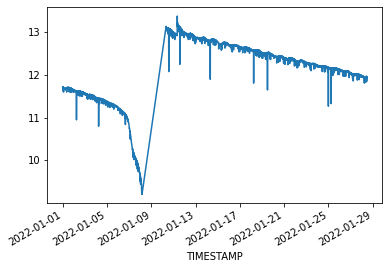

In [9]:
AllData.loc['2022-01-01':,'BattV_Avg'].plot()

<AxesSubplot:>

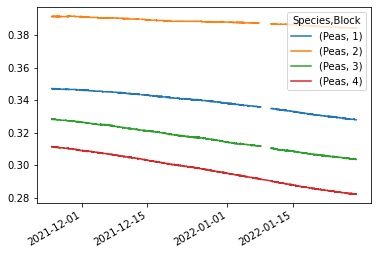

In [11]:
import matplotlib.pyplot as plt
Data.loc['2015-10-12':,:].VolumetricWaterContent.loc[:,('D5','7D')].plot()